In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score
from sklearn import metrics

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


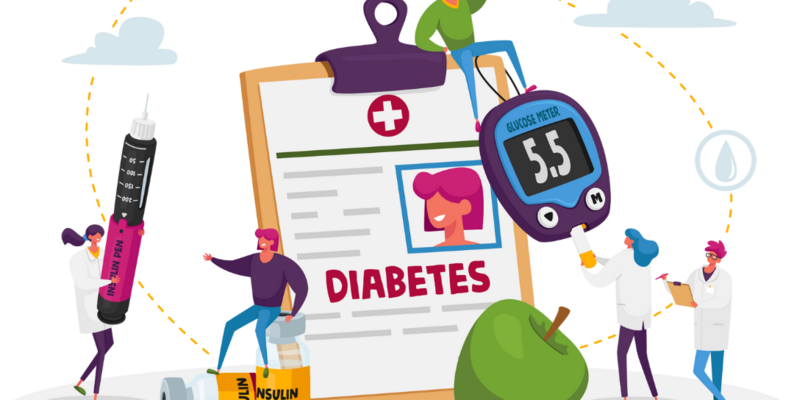


# planning 
## steps
1. add another dataset to make it a bit more balanced
1. see the data
    - check for dtypes ---> fix if needed
    - cheak for NaN values 
        - check for description to see the outlier or so 
        - check for hidden nan if its the case 
        

In [ ]:
train = pd.read_csv('/kaggle/input/wids2021/TrainingWiDS2021.csv', index_col=[0])
test = pd.read_csv('/kaggle/input/wids2021/UnlabeledWiDS2021.csv', index_col=[0])
dict_data = pd.read_csv('/kaggle/input/wids2021/DataDictionaryWiDS2021.csv')
new_train = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
#pd.set_option('display.max_columns', 200)

In [ ]:
new_train.columns

In [ ]:
df = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')

In [ ]:
df.columns

In [ ]:
train = train.rename(columns={'diabetes_mellitus':'diabetes'})

In [ ]:
df1 = df[df['diabetes'] == 1]

In [ ]:
#adding another dataset but olny thr age and diabetes column and from diabetes only the diabetes = 1 ones 
trainset = pd.concat([train, df1['diabetes']])
trainset = pd.concat([train, df1['age']])

In [ ]:
trainset.diabetes.shape[0] - train.diabetes.shape[0]

In [ ]:
trainset.diabetes.value_counts()

In [ ]:
trainset

In [ ]:
print(f'new augmented dataset shape: {trainset.diabetes.shape[0]} vs. original data shape {train.diabetes.shape[0]} difference is {trainset.diabetes.shape[0] - train.diabetes.shape[0]}')

In [ ]:
trainset.age.value_counts(ascending=True)

In [ ]:
train.columns

In [ ]:
train.select_dtypes(include='object')

In [ ]:
train.shape

In [ ]:
train.describe()

# Data Prep

In [ ]:
#data sounds inbalanced...
train.diabetes.value_counts() / train.shape[0] * 100

In [ ]:
#original dataset distribution of class diabetes 0/1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
(train.diabetes.value_counts() / train.shape[0] * 100).plot(
    kind='bar',
    color=['skyblue', 'pink'],
    title='diabetes diagnosed'
)
ax.set_xlabel('diabetes diognose', fontsize=14)
ax.set_ylabel('percentage', fontsize= 14)
ax.set_xticklabels(['No Diabetes', 'Diabetes'], rotation=0)
ax.set_ylim([0,100])
plt.show()


In [ ]:
#augmented dataset 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
(trainset.diabetes.value_counts() / train.shape[0] * 100).plot(
    kind='bar',
    color=['green', 'orange'],
    title='diabetes diagnosed'
)
ax.set_xlabel('diabetes diognose', fontsize=14)
ax.set_ylabel('percentage', fontsize= 14)
ax.set_xticklabels(['No Diabetes', 'Diabetes'], rotation=0)
ax.set_ylim([0,100])
plt.show()


In [ ]:
trainset.diabetes.value_counts()

In [ ]:
train.diabetes.value_counts()

In [ ]:
trainset.shape
#train.diabetes.shape

In [ ]:
train.diabetes.value_counts(ascending=True)[1]
trainset.diabetes.value_counts(ascending=True)[1]
print(f'difference between the augmented vs original in terms of Diabetes=1 is {trainset.diabetes.value_counts(ascending=True)[1] - train.diabetes.value_counts(ascending=True)[1]}')

# Data Cleaning

In [ ]:
trainset.head()

In [ ]:
#check for unique values
trainset.apache_post_operative.nunique()
#check for their value 
trainset.gcs_verbal_apache.value_counts()
trainset.readmission_status.value_counts() #only one data

In [ ]:
#dropping the unneccery columns 
#hospital info + icu info have zero impact on the overal purpose so dropped
trainset = trainset.drop(columns= ['encounter_id', 'hospital_id', 'hospital_admit_source', 'icu_admit_source', 'hospital_admit_source',
 'icu_admit_source',
 'icu_id',
 'icu_stay_type',
 'icu_type',
 'pre_icu_los_days',
 'readmission_status', 
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'h1_wbc_max',
 'h1_wbc_min',
])

# Age column:
it sounds like we have a bunch of (30) zero values for age which is not a valid amount for age, so we need to remove them
to do so, I will first check for them then replace them by NaN to further drop them...`

In [ ]:
#lets delve into the "age" column
#trainset.age.value_counts(ascending=True)
trainset['age'] = trainset.age.apply(lambda l: np.where(l == 0, np.nan, l))


## Takeout:
first i wanted the drop the NaN values of the Age Column. Before entirely dropping i decided to first see the the condition of it with respect to other columns

In [ ]:
trainset.loc[trainset.age.isnull(), ['bmi', 'diabetes']].describe()


## TakeOut:
SO as you see here, the columns that the age is NaN STILLL some of them has bmi or diabetes positive(1) so the decision to drop the NaNs of the Age column might lead to data loss so lets not drop them for now...

In [ ]:
trainset.loc[trainset.age.isnull(), ['age', 'bmi', 'diabetes']]

so in general we have 5018 NaN values for this column, some of which created by ourselvese as a result of replacement those 0 values and some were added as a result of the dataset we added and some were missing originally

In [ ]:
trainset.age.isna().sum()

# Gender Column


In [ ]:
trainset.gender.value_counts()

In [ ]:
trainset

In [ ]:
trainset.gender.isnull().sum()

In [ ]:
trainset.loc[trainset.gender.isnull() & trainset.height.isnull() & trainset.weight.isnull()]

In [ ]:
display(trainset.gender.isnull() & trainset.height.isnull() & trainset.weight.isnull())

In [ ]:
print(len(trainset))

In [ ]:
#removing the rows which all gender, heaght and weigh are zero at the same time
trainset = trainset[~(trainset.gender.isna() & trainset.height.isna() & trainset.weight.isna())]

In [ ]:
print(len(trainset))

## Takeout
SO again the same experiment we had on Age. There are lots of NaN values in the Gender column but should we really remove them? So i started by seeing the value of the other columns while gender is NaN and as we see the rest of columns have valid values so the decision to drop is so much tricky, So i just decided to drop only the 30 rows where at the heaight, weight, at the same time as gender are NaN

# Missing values
the purpose is to fill `Gender` and `weight`, and `height`. we can fill these manually or we can fill them using logregression to predict them. For instance, we will predict the `gender`, based on `['age', 'height', 'weight']` 

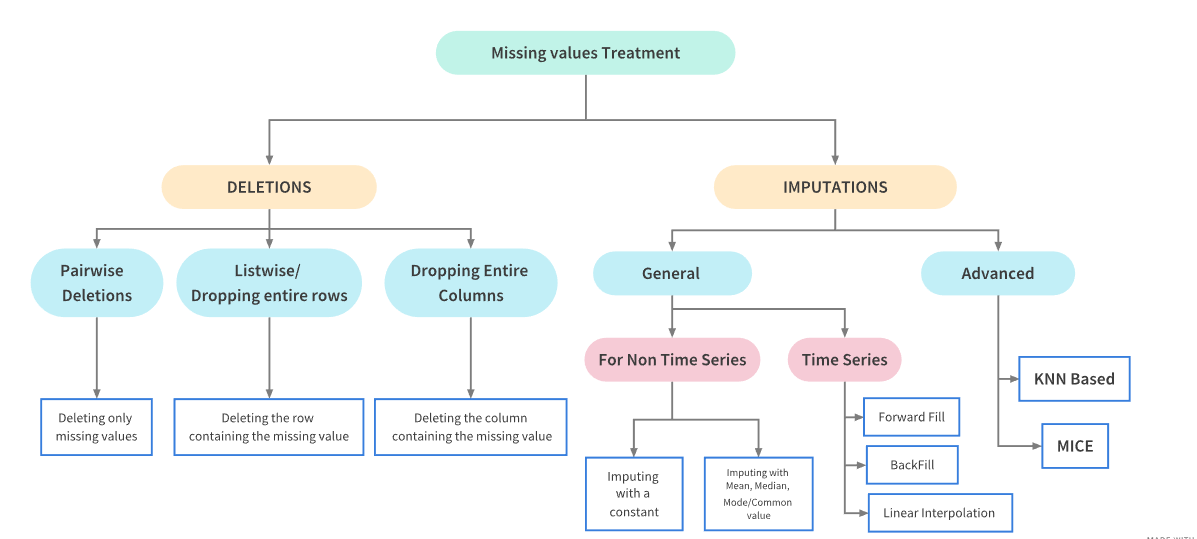

In [ ]:
trainset.head()

In [ ]:
# filling NaN of the Gender by predicting based on 3 features of age, hight, weight


# Fill NaN values and replace categorical values
trainset.loc[:, 'gender'] = trainset['gender'].fillna('unknown').replace({'M': 0, 'F': 1, 'unknown': -1})
trainset.loc[:, 'ethnicity'] = trainset['ethnicity'].fillna('other/unknown')

test.loc[:, 'gender'] = test['gender'].fillna('unknown').replace({'M': 0, 'F': 1, 'unknown': -1})
test.loc[:, 'ethnicity'] = test['ethnicity'].fillna('other/unknown')

# Create new tiny DataFrame
trainset_df = trainset[['age', 'ethnicity', 'gender', 'height', 'weight']].copy()
test_df = test[['age', 'ethnicity', 'gender', 'height', 'weight']].copy()

# Downcast object dtype arrays
trainset_df = trainset_df.infer_objects(copy=False)
test_df = test_df.infer_objects(copy=False)


In [ ]:
test_df.gender.value_counts()

In [ ]:
from sklearn.linear_model import LogisticRegression

# Fill missing values for age, height, and weight in trainset and testset
trainset_df['age'] = trainset_df['age'].fillna(trainset_df['age'].mean())
trainset_df['height'] = trainset_df['height'].fillna(trainset_df['height'].mean())
trainset_df['weight'] = trainset_df['weight'].fillna(trainset_df['weight'].mean())

test_df['age'] = test_df['age'].fillna(trainset_df['age'].mean())
test_df['height'] = test_df['height'].fillna(trainset_df['height'].mean())
test_df['weight'] = test_df['weight'].fillna(trainset_df['weight'].mean())

# Define features and target variable
features = ['age', 'height', 'weight']
target = 'gender'

# Iterate over unique ethnicities
for eth in trainset_df['ethnicity'].unique():
    if eth != 'other/unknown':
        # Filter trainset for current ethnicity and non-missing gender
        X_train = trainset_df[(trainset_df['ethnicity'] == eth) & (trainset_df['gender'] != -1)][features]
        y_train = trainset_df[(trainset_df['ethnicity'] == eth) & (trainset_df['gender'] != -1)][target]
        
        # Filter testset for current ethnicity and non-missing gender
        X_test = test_df[(test_df['ethnicity'] == eth) & (test_df['gender'] == -1)][features]  # NOTE ==1 MEANING Only predict for missing gender values
        y_test = test_df[(test_df['ethnicity'] == eth) & (test_df['gender'] == -1)][target]
    else:
        # Filter trainset for other/unknown ethnicity and non-missing gender
        X_train = trainset_df[trainset_df['gender'] != -1][features]
        y_train = trainset_df[trainset_df['gender'] != -1][target]
        
        # Filter testset for other/unknown ethnicity and non-missing gender
        X_test = test_df[test_df['gender'] == -1][features] #NOTE ==1 MEANING Only predict for missing gender values
        y_test = test_df[test_df['gender'] == -1][target]
    
    # Initialize and train a Logistic Regression classifier
    reg = LogisticRegression(random_state=0)
    reg.fit(X_train, y_train)
    
    # Predict on the test set
    if not X_test.empty:
        y_pred = reg.predict(X_test)
        
        # Update gender values in test_df
        test_df.loc[X_test.index, 'gender'] = y_pred

In [ ]:
test_df.gender.value_counts()

## Takeout
As you can see the model were successful in predicting those 5 missing genders

# Prediction/Modeling 
now we wanna build our model to get to decide for the testset

In [ ]:
#adding bmi to the tiny dataset we created
trainset_df['bmi'] = ((trainset_df['weight'] / 0.453592) / ((trainset_df['height']) /100 )**2) 

In [ ]:
trainset_df

In [ ]:
# Load and preprocess the dataset
#Define X and y
features = [
     'age',
     'bmi',
     'gender',
     'height',
     'weight',
    ]

X = trainset_df[features]
y = trainset.diabetes
#X_train, y_train = trainset[features], trainset.diabetes

In [ ]:
X.isnull().sum()

In [ ]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pre = logreg.predict(X_test)

In [ ]:
#X_test
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pre)}')

In [ ]:
precision_score(y_test, y_pre)

In [ ]:
from sklearn.metrics import roc_curve, auc
y_prob = logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(len(y_test), len(y_pred))


In [ ]:
test.columns.tolist()

In [ ]:
data.diabetes.value_counts()

In [ ]:
%pip install imbalanced-learn

In [ ]:
 #Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=0)

# Now you can proceed with modeling using the balanced data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [ ]:
y.value_counts()

In [ ]:
 #Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=0)

# Now you can proceed with modeling using the balanced data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)